In [1]:
from gabscraping import Words, draw_community, get_soup

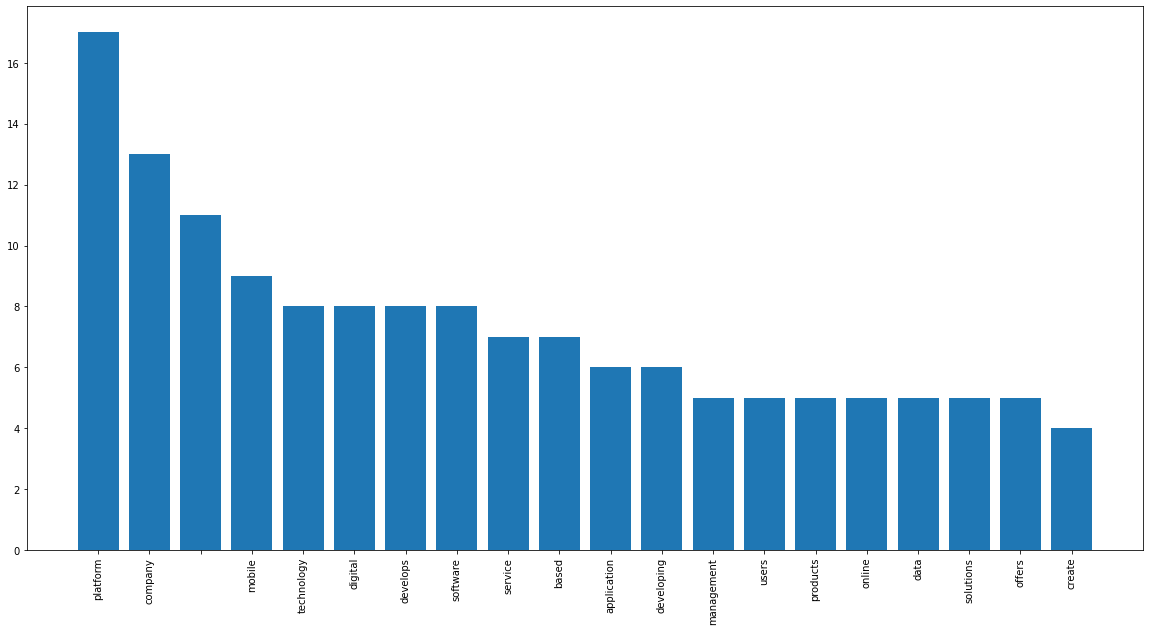

[('platform', 17),
 ('company', 13),
 ('', 11),
 ('mobile', 9),
 ('technology', 8),
 ('digital', 8),
 ('develops', 8),
 ('software', 8),
 ('service', 7),
 ('based', 7),
 ('application', 6),
 ('developing', 6),
 ('management', 5),
 ('users', 5),
 ('products', 5),
 ('online', 5),
 ('data', 5),
 ('solutions', 5),
 ('offers', 5),
 ('create', 4),
 ('smart', 4),
 ('enables', 4),
 ('solution', 4),
 ('provides', 4),
 ('connects', 4),
 ('business', 4),
 ('global', 4),
 ('vienna', 4),
 ('marketplace', 4),
 ('enterprises', 4),
 ('austria', 3),
 ('new', 3),
 ('first', 3),
 ('services', 3),
 ('analytics', 3),
 ('connect', 3),
 ('group', 3),
 ('austrias', 3),
 ('customer', 3),
 ('offline', 3),
 ('world', 3),
 ('diseases', 3),
 ('network', 3),
 ('trading', 3),
 ('leading', 3),
 ('way', 3),
 ('retail', 3),
 ('navigation', 3),
 ('infectious', 3),
 ('startup', 3),
 ('biopharmaceutical', 3),
 ('every', 3),
 ('book', 3),
 ('health', 3),
 ('intelligence', 3),
 ('ai', 3),
 ('prediction', 2),
 ('automated', 

In [2]:
seedsoup = get_soup('https://www.seedtable.com/startups-vienna')
seedups = {media.h5.text.replace('\n',''): {'url': media.h5.a['href'], 'description': media.p.text.replace('\n','').strip()} for media in seedsoup.find_all('div','media-body')[1:] if media.span.text != 'Sponsored'}
words = Words()
for s in seedups.values():
    words.add_text(s['description'])
freqs = words.plot_freqs()
freqs

In [ ]:
G = nx.Graph()
for keyw in [a[0] for a in freqs]:
    keygroup = []
    for k, v in seedups.items():
        if keyw in v['description']:
            keygroup.append(k)
    for i in keygroup:
        for j in keygroup:
            if i != j:
                G.add_edge(i,j)

In [ ]:
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)


In [ ]:
sorted((-d, n) for n, d in G.degree())
clustering = nx.clustering(G)
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
#sorted(map(sorted, top_level_communities))
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities));



In [ ]:
from networkx.algorithms.community import k_clique_communities
G_k5 = nx.Graph(G)


K5 = nx.convert_node_labels_to_integers(G_k5,first_label=2)
G_k5.add_edges_from(K5.edges())
c = list(k_clique_communities(G_k5, 4))
sorted(list(c[0]))

sdf = draw_community(G_k5, c)



for kcc in list(k_clique_communities(G_k5, 6)):
    clist = list(kcc)
    """if isinstance(clist[0], str):
        print("# community")
        for ic in clist:
            print(ic, seedups[ic]['description'])
        print()""";


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
Gmodu = G #nx.karate_club_graph()
c = list(greedy_modularity_communities(Gmodu))
draw_community(Gmodu, c)
print(c)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

words = ["game","gaming","gamed","games"]
ps = PorterStemmer()
 
for word in words:
    print(ps.stem(word))
    
ps = PorterStemmer()
 
sentence = "gaming, the gamers play games"
words = word_tokenize(sentence)
 
for word in words:
    print(word + ":" + ps.stem(word))

In [ ]:
thissoup = get_soup('https://www.semalytix.com/')
thiswords = Words()
thiswords.add_text(' '.join(thissoup.find_all(string=True)))

In [ ]:
thiswords.plot_freqs()

In [ ]:
forbessoup = get_soup('https://www.forbes.com/sites/ninaangelovska/2018/11/26/meet-the-100-most-innovative-startups-of-germany-in-2018/')
ups_classification = {}
for li in forbessoup.ol.find_all('li'):
    category = li.text.replace(li.a.text, '').replace('(', '').replace(')', '').strip()
    name = li.a.text.replace(u'\xa0', u' ')
    if category not in ups_classification:
        ups_classification[category] = []
    ups_classification[category].append(name)
ups_classification
    
    